In [ ]:
import plotly.express as px
import seaborn as sns

In [2]:
gapminder = px.data.gapminder()

In [19]:
# Scatter Plot of GDP vs. Life Expectancy
px.scatter(data_frame=gapminder, x = 'gdpPercap', y = 'lifeExp')

In [21]:
# Scatter Plot of GDP vs. Life Expectancy with Country
px.scatter(data_frame=gapminder, x = 'gdpPercap', y = 'lifeExp', color = 'country')

In [22]:
# Incorporating Population
px.scatter(data_frame=gapminder, x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop')

In [23]:
# Logarithmic Transformation
px.scatter(data_frame=gapminder, x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop', log_x=True)

In [24]:
# Limit to the year 2007
px.scatter(gapminder.query('year == 2007'), x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop',
          log_x = True)

In [25]:
# Boxplots for GDP by Continent
px.box(data_frame=gapminder, x = 'gdpPercap', color = 'continent')

In [27]:
# Histogram
px.histogram(gapminder.query('year == 2007')['lifeExp'])

<Axes: xlabel='lifeExp', ylabel='Count'>

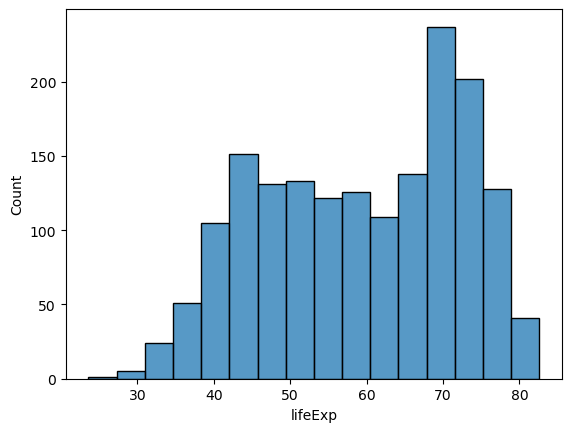

In [45]:
# Histogram of Life Expectancy with seaborn
sns.histplot(data=gapminder, x="lifeExp")

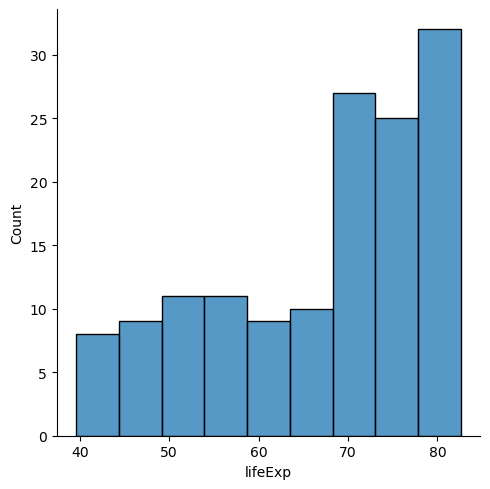

In [29]:
# Histogram with seaborn library
sns.displot(gapminder.query('year == 2007')['lifeExp'])

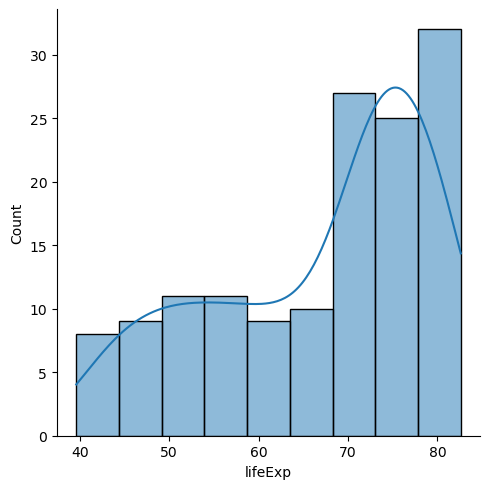

In [ ]:
# Histogram with kde(kernel density extimate), i.e rough probability distribution
sns.displot(gapminder.query('year == 2007')['lifeExp'], kde=True)

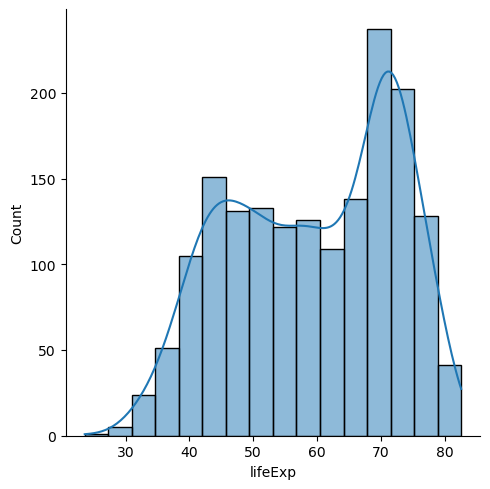

In [ ]:
# Histogram with kde
sns.displot(data=gapminder, x="lifeExp", kde=True)

<Axes: xlabel='lifeExp'>

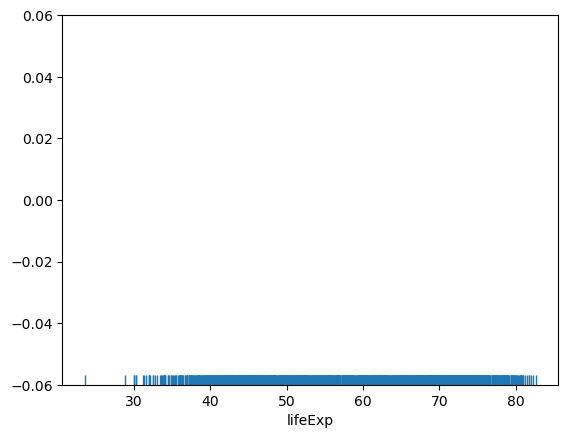

In [48]:
# rug plot with seaborn
sns.rugplot(data=gapminder, x="lifeExp")

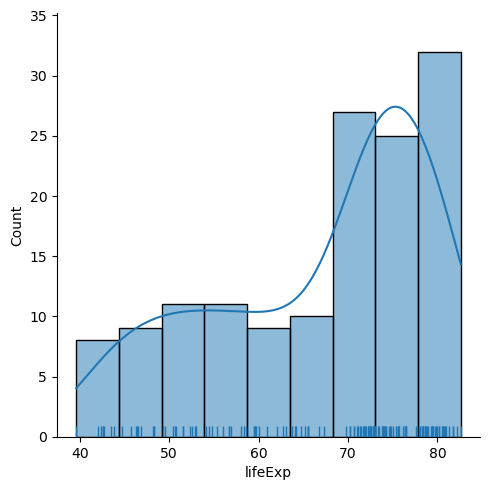

In [32]:
# Histogram with kde and a rug plot
sns.displot(gapminder.query('year == 2007')['lifeExp'], kde=True, rug=True)

In [49]:
# Violin plot with plotly
px.violin(gapminder, y='lifeExp')

In [35]:
# Violin plot with all points
px.violin(gapminder.query('year == 2007')['lifeExp'], points="all")

In [36]:
# Violin plot with all points
continents = ["Africa", "Europe"]
px.violin(gapminder.query('year == 2007 and continent in @continents').dropna(), y='lifeExp', color="continent")

In [ ]:
# Box plot
continents = ["Africa", "Europe"]
px.box(gapminder.query('year == 2007 and continent in @continents').dropna(), y='lifeExp', color="continent")

In [38]:
# Box plot with all continents
px.box(gapminder.query('year == 2007').dropna(), y='lifeExp', color="continent")

In [6]:
gdp_and_pop_by_entity = gapminder.set_index("country")
gdp_and_pop_by_entity["gdp"] = gdp_and_pop_by_entity["gdpPercap"] * gdp_and_pop_by_entity["pop"]

gdp_per_capita_1952 = gdp_and_pop_by_entity.query("year == 1952")[["gdpPercap"]]
gdp_pop_1952 = gdp_and_pop_by_entity.query("year == 1952")[["pop"]]
gdp_1952 = gdp_per_capita_1952["gdpPercap"] * gdp_pop_1952["pop"]

gdp_and_pop_by_entity["gdpPercap_ratio"] = gdp_and_pop_by_entity["gdpPercap"] / gdp_per_capita_1952["gdpPercap"]
gdp_and_pop_by_entity["pop_ratio"] = gdp_and_pop_by_entity["pop"] / gdp_pop_1952["pop"]
gdp_and_pop_by_entity["gdp_ratio"] = gdp_and_pop_by_entity["gdp"] / gdp_1952

gdp_and_pop = gdp_and_pop_by_entity.reset_index()
gdp_and_pop

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp,gdpPercap_ratio,pop_ratio,gdp_ratio
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09,1.000000,1.000000,1.000000
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09,1.053125,1.096803,1.155071
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09,1.094497,1.218597,1.333751
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09,1.072811,1.369437,1.469147
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09,0.949369,1.552397,1.473797
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716,6.508241e+09,1.735524,2.991463,5.191756
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716,7.422612e+09,1.704222,3.474412,5.921169
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716,9.037851e+09,1.947606,3.701815,7.209677
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716,8.015111e+09,1.651671,3.871121,6.393817


In [18]:
px.line(gdp_and_pop, x="year", y="pop_ratio", color="country")

In [8]:
px.scatter(gdp_and_pop.query("year == 2002"), x="gdpPercap_ratio", y="pop_ratio", color = "country")

In [9]:
px.scatter(gdp_and_pop.query("year == 2002"), x="gdpPercap_ratio", y="pop_ratio", color = "country", size="gdp_ratio")

In [15]:
px.scatter(gdp_and_pop.query("year == 2002"), x = "gdpPercap", y = "lifeExp", color = "country")

In [16]:
px.scatter(gdp_and_pop.query("year == 2002"), x = "gdpPercap", y = "lifeExp", color = "country", log_x=True)

In [ ]:
# Marginal plots
px.scatter(gdp_and_pop.query("year == 2007"), x = "gdpPercap", y = "lifeExp", 
           marginal_x="histogram", marginal_y="histogram")

In [42]:
# Marginal plots
px.scatter(gdp_and_pop.query("year == 2007"), x = "gdpPercap", y = "lifeExp", 
           marginal_x="box", marginal_y="box")

In [43]:
# Marginal plots
px.density_heatmap(gdp_and_pop.query("year == 2007"), x = "gdpPercap", y = "lifeExp", 
           marginal_x="histogram", marginal_y="histogram")

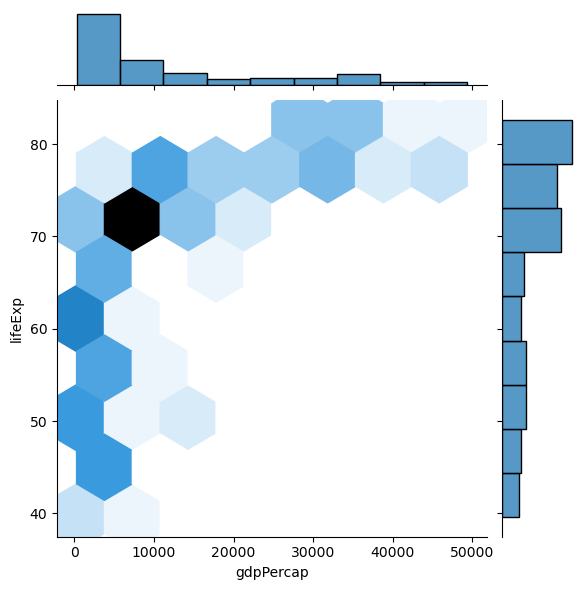

In [ ]:
# Joint plots with seaborn
sns.jointplot(gdp_and_pop.query("year == 2007"), x = "gdpPercap", y = "lifeExp", kind="hex")